# Simulated Annealing Demonstration

use Travelling Salesperson Problem (TSP) as an example.

Based on: Nathan Rooy, [Effective Simulated Annealing with Python](https://https://nathanrooy.github.io/posts/2020-05-14/simulated-annealing-with-python/).


This notebook requires the landscapes package. So install that with ```pip```

In [1]:
pip install landscapes

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


This script will require that you place the sa.py file from Canvas in the same directory as this notebook.

In [2]:
import sa

For combinatorial problems such as the traveling salesman problem, usage is just as easy. First, let's define a method for calculating the distance between our points. In this case, Euclidean distance is used, but it can be anything...

In [3]:
def calc_euclidean(p1, p2):    
    return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**0.5

Next, let's prepare some points. In the intrest of simplicity, we'll just generate 6 points on the perimiter of the unit circle.

In [4]:
from math import cos
from math import sin
from math import pi
n_pts = 10
dr = (2 * pi) / n_pts

x0 = []
for i in range(0,n_pts):
    radians = dr * i  
    x0.append([cos(radians), sin(radians)])


Now, prepare the cost function.

In [5]:
from landscapes.single_objective import tsp
cost_func = tsp(calc_euclidean, close_loop=True).dist

In [14]:
cost_func

<bound method tsp.dist of <landscapes.single_objective.tsp object at 0x7f4f4c2091d0>>

Because we generated our perimiter points in rotational order, x0 is already the optimal solution. We can check this with:

In [6]:
cost_func(x0)

6.180339887498949

Just under two pi...

Now let's optimize this while remembering to shuffle the points prior to running.

In /home/hp/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/hp/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/hp/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/hp/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/hp/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_tes

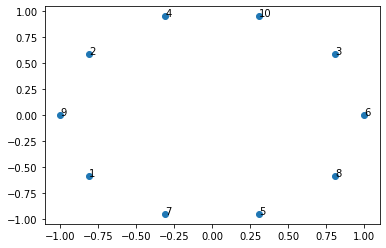

In [7]:
from random import shuffle
import matplotlib.pyplot as plt
shuffle(x0)
opt = sa.minimize(cost_func, x0, opt_mode='combinatorial', step_max=1000, t_max=1, t_min=0)

# Display the shuffled datapoints
plt_x,plt_y = zip(*x0)
fig, ax = plt.subplots()
ax.scatter(plt_x, plt_y)

for i in range(n_pts):
  ax.annotate(str(i+1), (plt_x[i], plt_y[i]))
plt.show()

We can view the results with the following:

In [8]:
opt.results()

+------------------------ RESULTS -------------------------+

      opt.mode: combinatorial
cooling sched.: linear additive cooling


  initial temp: 1
    final temp: 0.001000
     max steps: 1000
    final step: 1000

  final energy: 6.180340

+-------------------------- END ---------------------------+


We can access the optimal solution via:

In [9]:
opt.best_state

[[-1.0, 1.2246467991473532e-16],
 [-0.8090169943749476, -0.587785252292473],
 [-0.30901699437494756, -0.9510565162951535],
 [0.30901699437494723, -0.9510565162951536],
 [0.8090169943749473, -0.5877852522924734],
 [1.0, 0.0],
 [0.8090169943749475, 0.5877852522924731],
 [0.30901699437494745, 0.9510565162951535],
 [-0.30901699437494734, 0.9510565162951536],
 [-0.8090169943749473, 0.5877852522924732]]

And then plot it to further validate that we have indeed achieved the global minimum. 

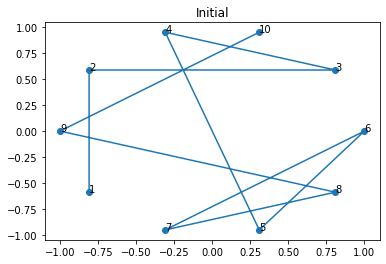

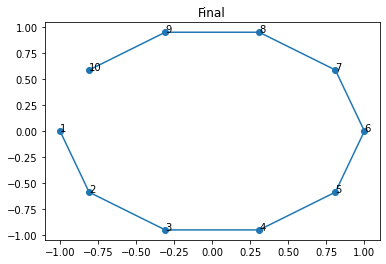

In [10]:
# Display the original datapoints
plt_x,plt_y = zip(*x0)
fig, ax = plt.subplots()
ax.plot(plt_x,plt_y)
ax.scatter(plt_x, plt_y)
plt.title("Initial")
for i in range(n_pts):
  ax.annotate(str(i+1), (plt_x[i], plt_y[i]))
plt.show()

# Display the SA Solution
plt_x,plt_y = zip(*opt.best_state)
fig, ax = plt.subplots()
ax.plot(plt_x,plt_y)
ax.scatter(plt_x, plt_y)
plt.title("Final")
for i in range(n_pts):
  ax.annotate(str(i+1), (plt_x[i], plt_y[i]))
plt.show()

In [11]:
import os
import sys
import math
import numpy as np

import matplotlib.pyplot as plt
from random import choice, shuffle, sample, uniform

#假设下面是五个地点的距离对称矩阵(Wij = Wji)
names = ['重庆','上海','北京','广州','昆明']
arr = ([0,50,30,10,10],
       [50,0,60,30,20],
       [30,60,0,80,70],
       [20,30,80,0,60],
       [10,20,70,60,0])

num = len(arr)

print("模拟退火算法查找最短路径：")
### 参数：最小路径的最后一个节点和邻域
def valSimulateAnnealSum(curnode, nextnodeList, t):

  if nextnodeList == None or len(nextnodeList) < 1:
    print("empty")
    return 0

  maxcost = sys.maxsize
  retnode = 0

  for node in nextnodeList:
    # print "curnode : ",curnode ," node: " ,node ," mincost : ",mincost

    t *= 0.98  ## 退火因子
    if arr[curnode][node] < maxcost:
      maxcost = arr[curnode][node]
      retnode = node
    ## 以一定的概率接受较差的解
    else:
      #r = uniform(0, 1)
      r = math.exp((arr[curnode][node] - maxcost)/t)
      if arr[curnode][node] > maxcost and t > t_min and math.exp((arr[curnode][node] - maxcost) / t) > r:
        #print " t = " ,t , "maxcost = ", maxcost , " arr = " ,arr[curnode][node],   "  exp = ",math.exp((arr[curnode][node] - maxcost)/t)  ,  " r = ",r , "t_min = " ,t_min
        retnode = node
        maxcost = arr[curnode][node]
        return(retnode, maxcost, t)

  return (retnode, maxcost, t)


indexList = [i for i in range(num)]  ### 原始的节点序列
selectedList = []  ## 选择好的元素

### 具体思想是： 从剩余的元素中随机选择十分之一的元素，作为邻域。然后从邻域中选择一个元素作为已经构建好的最小路径的下一个节点，
#  使得该路径
mincost = sys.maxsize  ###最小的花费

count = 0  ### 计数器
t = 100  ## 初始温度
t_min = 50  ## 最小温度
while count < num:
  count += 1
  ### 构建一个邻域: 如果indexList中元素个数大于10个，则取样的个数为剩余元素个数的十分之一的整数。否则为剩余元素个数对10的取余数
  leftItemNum = len(indexList)
  #  print "leftItemNum:" ,leftItemNum
  #nextnum = leftItemNum // 10 if leftItemNum >= 10 else leftItemNum % 10
  #nextnodeList = sample(indexList, nextnum)  ### 从剩余的节点中选出nextnum个节点
  if leftItemNum < 2:
    leftItemNum = 1
  else:
    leftItemNum -= 1

  nextnodeList = sample(indexList, leftItemNum)

  if len(selectedList) == 0:
    item = choice(nextnodeList)
    selectedList.append(item)
    indexList.remove(item)
    mincost = 0
    continue

  curnode = selectedList[len(selectedList) - 1]
  # print "nextnodeList:" ,nextnodeList
  nextnode, maxcost, t = valSimulateAnnealSum(curnode, indexList, t)  ### 对待选的序列路径求和

  ### 将返回的路径值添加到原来的路径值上，同时，在剩余的节点序列中，删除nextnode节点
  mincost += maxcost
  indexList.remove(nextnode)
  selectedList.append(nextnode)

print("最合适的路径为：", selectedList)
print("对应城市",names)
print("路径节点个数：", len(selectedList))
print("最小花费为：", mincost)

模拟退火算法查找最短路径：
最合适的路径为： [3, 0, 4, 1, 2]
对应城市 ['重庆', '上海', '北京', '广州', '昆明']
路径节点个数： 5
最小花费为： 110
